In [19]:
#get history of a stock from yahoo finance 1385.HK

import yfinance as yf
import pandas as pd

# get history of a stock from yahoo finance per minute
def get_history(stock):
    data = yf.download(stock, start="2021-08-04", end="2024-09-30")
    return data

# 1385.HK
stock = '1385.HK'
data = get_history(stock)
data.to_csv(stock + '.csv')

# 688385 A股 from Tushare
stock = '688385.SH'
import tushare as ts
ts.set_token('537c1ddb521e558f13c14a8d4cc6b0c20aca9ec40e0f4cbccf7cb297')
pro = ts.pro_api()
df = pro.daily(ts_code=stock, start_date='20200101', end_date='20240930')
df.to_csv(stock + '.csv')


[*********************100%%**********************]  1 of 1 completed


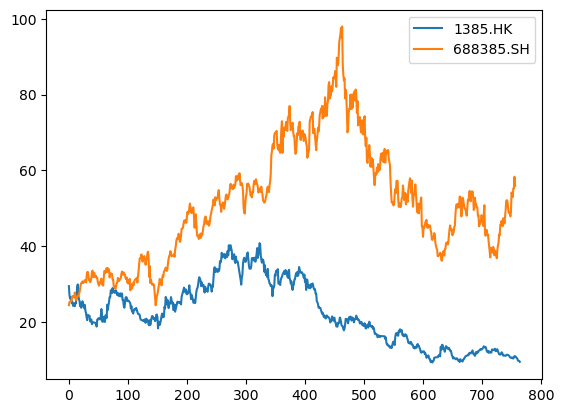

In [28]:
#compare the two stocks
df = pd.read_csv('1385.HK.csv')
df2 = pd.read_csv('688385.SH.csv')
#change date into the same format
df['Date'] = pd.to_datetime(df['Date'])
df2['trade_date'] = pd.to_datetime(df2['trade_date'], format='%Y%m%d')
#sort by date
df = df.sort_values(by='Date')
df2 = df2.sort_values(by='trade_date')
#only use the date that both stocks have
df = df[df['Date'].isin(df2['trade_date'])]
df2 = df2[df2['trade_date'].isin(df['Date'])]

#plot the two stocks
import matplotlib.pyplot as plt

plt.plot(df['Close'], label='1385.HK')
plt.plot(df2['close'], label='688385.SH')
plt.legend()
plt.show()


In [25]:
df['Date']

Series([], Name: Date, dtype: object)

In [33]:
#correlation
import numpy as np
def correlation(x, y):
    x = np.array(x)
    y = np.array(y)
    return x @ y / (np.sqrt(x @ x) * np.sqrt(y @ y))
#calculate daily return
df['daily_return'] = df['Close'].pct_change().fillna(0)
df2['daily_return'] = df2['close'].pct_change().fillna(0)
#calculate correlation
print(correlation(df['daily_return'], df2['daily_return'].shift(-1).fillna(0)))

-0.035306413499926366


In [34]:
print(correlation(df['daily_return'], df2['daily_return'].shift(1).fillna(0)))

-0.09746142511513897


In [35]:
print(correlation(df['daily_return'], df['daily_return'].shift(1).fillna(0)))

-0.11406712853798325


In [36]:
print(correlation(df2['daily_return'], df2['daily_return'].shift(1).fillna(0)))

-0.06701300504172246


In [51]:
#all the stocks in China make a list

df = pro.index_basic()
#rank by ts_code and store
df = df.sort_values(by='ts_code')
df.to_csv('stocks_index.csv')

In [53]:

df = pro.index_basic(market='SSE')
df[df['ts_code'] == '688385.SH']

,ts_code,name,market,publisher,category,base_date,base_point,list_date


In [48]:
#find where 688385 is
df[df['ts_code'] == '688385.SH']
#find listdate > 20210801
df = df[df['list_date'] > '20210801']

In [60]:
df

,ts_code,symbol,name,area,industry,market,list_date
0,600000.SH,600000,浦发银行,上海,银行,主板,19991110
1,600004.SH,600004,白云机场,广东,机场,主板,20030428
2,600006.SH,600006,东风股份,湖北,汽车整车,主板,19990727
3,600007.SH,600007,中国国贸,北京,园区开发,主板,19990312
4,600008.SH,600008,首创环保,北京,水务,主板,20000427
...,...,...,...,...,...,...,...
2260,688799.SH,688799,华纳药厂,湖南,化学制药,科创板,20210713
2261,688800.SH,688800,瑞可达,江苏,元器件,科创板,20210722
2262,688819.SH,688819,天能股份,浙江,电气设备,科创板,20210118
2263,688981.SH,688981,中芯国际,上海,半导体,科创板,20200716


,ts_code,symbol,name,area,industry,market,list_date
2024,688385.SH,688385,复旦微电,上海,半导体,科创板,20210804


In [59]:
df = pro.stock_basic(exchange='SSE', list_status='L', fields='ts_code,symbol,name,area,industry,market,list_date')
kechuang_stocks = df[df['ts_code'].str.startswith('688')]
print(kechuang_stocks)

Exception: 抱歉，您每小时最多访问该接口1次，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。

In [50]:
for stock in df['ts_code']:
    print(stock)
    # df = pro.daily(ts_code=stock, start_date='20210801', end_date='20210930')
    # df.to_csv(stock + '.csv')
    # print('done')

000682.SH
000683.SH
000683CNY01.SH
000683CNY02.SH
000685.SH
000685CNY01.SH
000685CNY02.SH
000687.SH
000687CNY01.SH
000687CNY02.SH
000689.SH
000689CNY01.SH
000689CNY02.SH
000690.SH
000690CNY01.SH
000690CNY02.SH
000691.SH
000691CNY010.SH
000692.SH
000692CNY01.SH
000692CNY02.SH
000693.SH
000693CNY01.SH
000693CNY02.SH
000695.SH
000695CNY01.SH
000695CNY02.SH
000697.SH
000697CNY01.SH
000697CNY02.SH
000698.SH
000698CNY010.SH
000698CNY020.SH
000698EUR200.SH
000698EUR210.SH
000698GBP200.SH
000698GBP210.SH
000698HKD200.SH
000698HKD210.SH
000698USD200.SH
000698USD210.SH
000698USD300.SH
000698USD310.SH
000922CNY020.CSI
399019.SZ
399020.SZ
399030.SZ
399060.SZ
399201.CJ
399202.CJ
399203.CJ
399258.SZ
399259.SZ
399260.SZ
399261.SZ
399262.SZ
399263.SZ
399264.SZ
399265.SZ
399266.SZ
399274.SZ
399750.SZ
399850.SZ
470026.CNI
470027.CNI
470028.CNI
470029.CNI
470030.CNI
470031.CNI
470032.CNI
470033.CNI
470034.CNI
470035.CNI
470036.CNI
470037.CNI
470038.CNI
470039.CNI
470040.CNI
470041.CNI
470042.CNI
470043.C